## A test with UCR dataset

In [1]:
import keras
from keras.utils import to_categorical
from keras.optimizers import Adam
import sklearn
from tslearn.datasets import UCR_UEA_datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.interpolate import spline
import scipy.interpolate as interpolate
from sklearn.utils import shuffle
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
classifier = 'fcn'
archive_name = 'TSC_itr_8'
dataset_name = 'GunPoint'
root_dir = 'C:/Users/xngu0004/Downloads/Code/testPy/dl-4-tsc'
max_length = 2000

In [3]:
x_train1, y_train1a, x_test1, y_test1a = UCR_UEA_datasets().load_dataset(dataset_name)

In [4]:
y_train1 = y_train1a - 1
y_test1 = y_test1a - 1

In [5]:
x_test, y_test = shuffle(x_test1, y_test1, random_state = random.randint(10,50))

In [6]:
x_train, y_train = shuffle(x_train1, y_train1, random_state = random.randint(10,50))

In [7]:
x_train.shape

(50, 150, 1)

In [8]:
y_test

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [9]:
input_shape = x_train.shape[1:]
input_shape

(150, 1)

In [10]:
nb_classes = len(np.unique(y_train))
nb_classes

2

In [11]:
def build_model(input_shape, nb_classes):
	input_layer = keras.layers.Input(input_shape)

	conv1 = keras.layers.Conv1D(filters=64, kernel_size=7, padding='same')(input_layer)
	conv1 = keras.layers.normalization.BatchNormalization()(conv1)
	conv1 = keras.layers.Activation(activation='relu')(conv1)

	conv2 = keras.layers.Conv1D(filters=128, kernel_size=5, padding='same')(conv1)
	conv2 = keras.layers.normalization.BatchNormalization()(conv2)
	conv2 = keras.layers.Activation('relu')(conv2)

	conv3 = keras.layers.Conv1D(64, kernel_size=3,padding='same')(conv2)
	conv3 = keras.layers.normalization.BatchNormalization()(conv3)
	conv3 = keras.layers.Activation('relu')(conv3)

	gap_layer = keras.layers.pooling.GlobalAveragePooling1D()(conv3)

	output_layer = keras.layers.Dense(nb_classes, activation='softmax')(gap_layer)

	model = keras.models.Model(inputs=input_layer, outputs=output_layer);model.summary()
    
	return model 

In [12]:
# One-hot coding
labels_train = to_categorical(y_train)
labels_test = to_categorical(y_test)

In [13]:
weight_fn = "./weights1=2.h5"
model_checkpoint = ModelCheckpoint(weight_fn, verbose=1, mode='max', monitor='val_acc', 
                                   save_best_only=True, save_weights_only=True)
callback_list = [model_checkpoint]

In [54]:
model = build_model(input_shape, nb_classes)
epochs_s = 25
batch_s = 4
learning_rate = 1e-3 
optm = Adam(lr=learning_rate)
model.compile(optimizer=optm, loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 1)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 150, 64)           512       
_________________________________________________________________
batch_normalization_7 (Batch (None, 150, 64)           256       
_________________________________________________________________
activation_7 (Activation)    (None, 150, 64)           0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 150, 128)          41088     
_________________________________________________________________
batch_normalization_8 (Batch (None, 150, 128)          512       
_________________________________________________________________
activation_8 (Activation)    (None, 150, 128)          0         
__________

In [55]:
model.fit(x_train, labels_train, batch_size=batch_s, epochs=epochs_s, 
          callbacks = callback_list, verbose=2, 
          validation_data=(x_test, labels_test))

Train on 50 samples, validate on 150 samples
Epoch 1/25
 - 1s - loss: 0.7159 - acc: 0.5000 - val_loss: 0.6806 - val_acc: 0.5600

Epoch 00001: val_acc did not improve from 0.76000
Epoch 2/25
 - 0s - loss: 0.6197 - acc: 0.6200 - val_loss: 0.6359 - val_acc: 0.6267

Epoch 00002: val_acc did not improve from 0.76000
Epoch 3/25
 - 0s - loss: 0.5803 - acc: 0.7200 - val_loss: 0.7198 - val_acc: 0.5667

Epoch 00003: val_acc did not improve from 0.76000
Epoch 4/25
 - 0s - loss: 0.5509 - acc: 0.7600 - val_loss: 0.6369 - val_acc: 0.6467

Epoch 00004: val_acc did not improve from 0.76000
Epoch 5/25
 - 0s - loss: 0.5754 - acc: 0.7200 - val_loss: 0.5824 - val_acc: 0.6733

Epoch 00005: val_acc did not improve from 0.76000
Epoch 6/25
 - 0s - loss: 0.5423 - acc: 0.7000 - val_loss: 0.5454 - val_acc: 0.7933

Epoch 00006: val_acc improved from 0.76000 to 0.79333, saving model to ./weights1=2.h5
Epoch 7/25
 - 0s - loss: 0.4573 - acc: 0.8600 - val_loss: 0.5270 - val_acc: 0.7933

Epoch 00007: val_acc did not i

In [60]:
model.load_weights(weight_fn)
prediction = model.predict(x_test);

In [61]:
y_pred = np.argmax(prediction, axis=1)
y_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [62]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        76
           1       0.96      0.95      0.95        74

   micro avg       0.95      0.95      0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [63]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[73  3]
 [ 4 70]]


In [64]:
classes = np.unique(y_test)
classes

array([0, 1])

In [65]:
# the same input
new_input_layer = model.inputs
# output is both the original as well as the before last layer
new_output_layer = [model.layers[-3].output, model.layers[-1].output]

new_feed_forward = keras.backend.function(new_input_layer, new_output_layer)

# filters
w_k_c = model.layers[-1].get_weights()[0] #  weights for each filter k for each class c
w_k_c.shape

(64, 2)

### Using spline 

c =  0


C:\Users\xngu0004\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
C:\Users\xngu0004\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


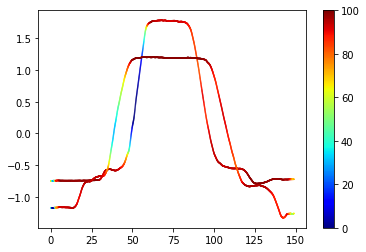

c =  1


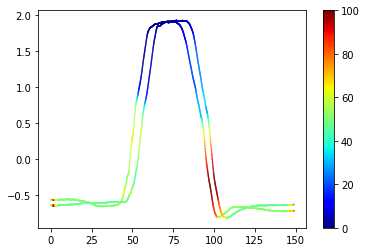

In [48]:
for c in classes:
    print("c = ", c)
    plt.figure()
    count = 0
    count1 = 0
    c_x_train = x_train[np.where(y_train==c)]
    for ts in c_x_train:
        count1 += 1       
        ts = ts.reshape(1,-1,1)
        [conv_out, predicted] = new_feed_forward([ts])
        pred_label = np.argmax(predicted)
        if pred_label == c:
            count += 1
            if (count < 3):
                cas = np.zeros(dtype=np.float, shape=(conv_out.shape[1]))
                for k, w in enumerate(w_k_c[:, c]):
                    cas += w * conv_out[0,:, k]

                minimum = np.min(cas)
                cas = cas - minimum
                cas = cas / max(cas)
                cas = cas * 100

                x = np.linspace(0,ts.shape[1]-1,max_length,endpoint=True)
                # linear interpolation to smooth
                y = spline(range(ts.shape[1]),ts[0,:,0],x)
                cas = spline(range(ts.shape[1]),cas,x)
                cas = cas.astype(int)
                plt.scatter(x=x,y=y,c=cas,cmap='jet', marker='.',s=1,vmin=0,vmax = 100)         

    cbar = plt.colorbar()
    #cbar.ax.set_yticklabels([100,75,50,25,0])
    plt.show()
    #plt.savefig(root_dir+'/results/'+classifier+'/'+archive_name+'/'+dataset_name+'/'+str(int(c))+'.png',
                #bbox_inches='tight',dpi=1080)

### Using Bspline class 

c =  0


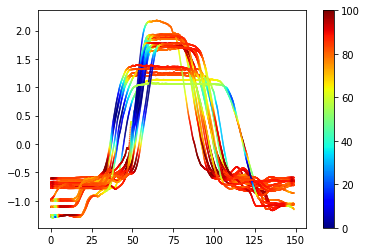

c =  1


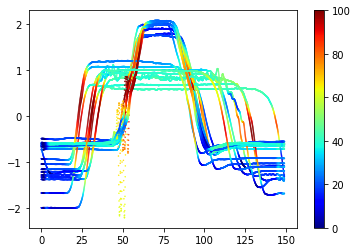

In [66]:
for c in classes:
    print("c = ", c)
    plt.figure()
    count = 0
    count1 = 0
    c_x_train = x_test[np.where(y_test==c)]
    for ts in c_x_train:
        count1 += 1 
        ts = ts.reshape(1,-1,1)
        [conv_out, predicted] = new_feed_forward([ts])
        pred_label = np.argmax(predicted)
        if pred_label == c:
            count += 1
            if (count < 22):
                cas = np.zeros(dtype=np.float, shape=(conv_out.shape[1]))
                for k, w in enumerate(w_k_c[:, c]):
                    cas += w * conv_out[0,:, k]

                minimum = np.min(cas)
                cas = cas - minimum
                cas = cas / max(cas)
                cas = cas * 100

                xx = np.linspace(0,ts.shape[1]-1,ts.shape[1],endpoint=True)
                yy = ts.reshape(-1)
                t, cc, k = interpolate.splrep(xx, yy, s=0, k=5)
                t1, cc1, k1 = interpolate.splrep(xx, cas, s=0, k=5)
                x = np.linspace(0,ts.shape[1]-1,max_length,endpoint=True)

                y = interpolate.BSpline(t, cc, k, extrapolate=False)
                cas = interpolate.BSpline(t1, cc1, k1, extrapolate=False)

                plt.scatter(x=x,y=y(x),c=cas(x).astype(int),cmap='jet', marker='.',s=1,vmin=0,vmax = 100) 

    cbar = plt.colorbar()
    plt.show()
    #plt.savefig(root_dir+'/results/'+classifier+'/'+archive_name+'/'+dataset_name+'/'+str(int(c))+'.png',
                #bbox_inches='tight',dpi=1080)

#### Others 

t: [0.   0.   0.   0.   0.   2.55 3.6  6.5  6.5  6.5  6.5  6.5 ]
c: [-8.54962435e-17  3.30461215e+00  4.99503539e-01  9.09707830e+00
 -1.06110196e+00  9.32088484e-01  3.10000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
k: 4



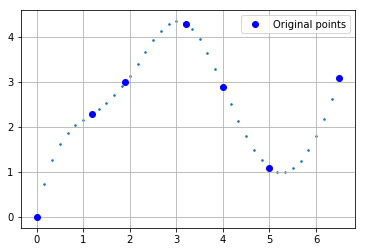

In [92]:
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt

x = np.array([ 0. ,  1.2,  1.9,  3.2,  4. , 5., 6.5])
y = np.array([ 0. ,  2.3,  3. ,  4.3,  2.9, 1.1,  3.1])

t, c, k = interpolate.splrep(x, y, s=0, k=4)
print('''\
t: {}
c: {}
k: {}
'''.format(t, c, k))
N = 40
xmin, xmax = x.min(), x.max()
xx = np.linspace(xmin, xmax, N)
spline = interpolate.BSpline(t, c, k, extrapolate=False)

plt.plot(x, y, 'bo', label='Original points')
#plt.plot(xx, spline(xx), 'r', label='BSpline')
plt.scatter(x=xx,y=spline(xx),cmap='jet', marker='.',s=10,vmin=0,vmax = 100)
plt.grid()
plt.legend(loc='best')
plt.show()

In [72]:
xx.shape

(30,)

In [93]:
tt = x_train[0]
tt.shape

(150, 1)

In [97]:
x1 = np.linspace(0,tt.shape[1]-1,tt.shape[0],endpoint=True)
x1

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149.])

In [ ]:
x1 = np.linspace(0,ts.shape[1]-1,max_length,endpoint=True)